In [1]:
import pandas as pd
import regex as re
import string
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LinearRegression
from bs4 import BeautifulSoup
import requests
import numpy as np


In [41]:
df_true=pd.read_csv('../datasets/True.csv')
df_true['class']=1
# df_true.head()
df_fake=pd.read_csv('../datasets/Fake.csv')
df_fake['class']=0
frames=[df_fake,df_true]
df=pd.concat(frames,axis=0)
df.head(20)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [43]:
df.columns
df=df.drop(["title","subject","date"],axis=1)

In [44]:
df=df.sample(frac=1)


,text,class
10941,"Dr. Abdul El-Sayed, a liberal Democrat would l...",0
6261,As the Democratic Primary devolves into tense ...,0
17087,The result of Britain s willingness to allow M...,0
6459,Senator John McCain just got outed as a hypocr...,0
12156,,0
15469,ABUJA (Reuters) - Nigeria s President Muhammad...,1
21243,It only took what 14 years for this to happen?...,0
23455,Tune in to the Alternate Current Radio Network...,0
2529,"Unwilling to do the right thing himself, the U...",0
18954,"Remember when liberal media and entertainers, ...",0


In [45]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)
df.head(20)

,text,class
0,"Dr. Abdul El-Sayed, a liberal Democrat would l...",0
1,As the Democratic Primary devolves into tense ...,0
2,The result of Britain s willingness to allow M...,0
3,Senator John McCain just got outed as a hypocr...,0
4,,0
5,ABUJA (Reuters) - Nigeria s President Muhammad...,1
6,It only took what 14 years for this to happen?...,0
7,Tune in to the Alternate Current Radio Network...,0
8,"Unwilling to do the right thing himself, the U...",0
9,"Remember when liberal media and entertainers, ...",0


In [7]:
def clean(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    # text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text


In [8]:
df["text"]=df["text"].apply(clean)

In [9]:
df["text"]

0        milwaukee  reuters    democratic presidential ...
1        truck drivers are   fed up with illegal muslim...
2        lima  reuters    teachers in peru started retu...
3        to say hillary clinton wiped the floor with do...
4        bravo  it s about time some of the conservativ...
                               ...                        
44893    washington  reuters    the u s  state departme...
44894    washington  reuters    u s  president donald t...
44895    washington  reuters    u s  president elect do...
44896    beirut  reuters    saad al hariri  who sparked...
44897    cannes  france  reuters    u s  president dona...
Name: text, Length: 44898, dtype: object

In [10]:
X=df["text"]
y=df["class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(X_test)

In [12]:
from sklearn.svm import LinearSVC
svclf=LinearSVC(dual=0,random_state=42)
svclf.fit(xv_train,y_train)

LinearSVC(dual=0, random_state=42)

c:\Users\amanb\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\amanb\AppData\Local\Temp\ipykernel_13820\1062315041.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


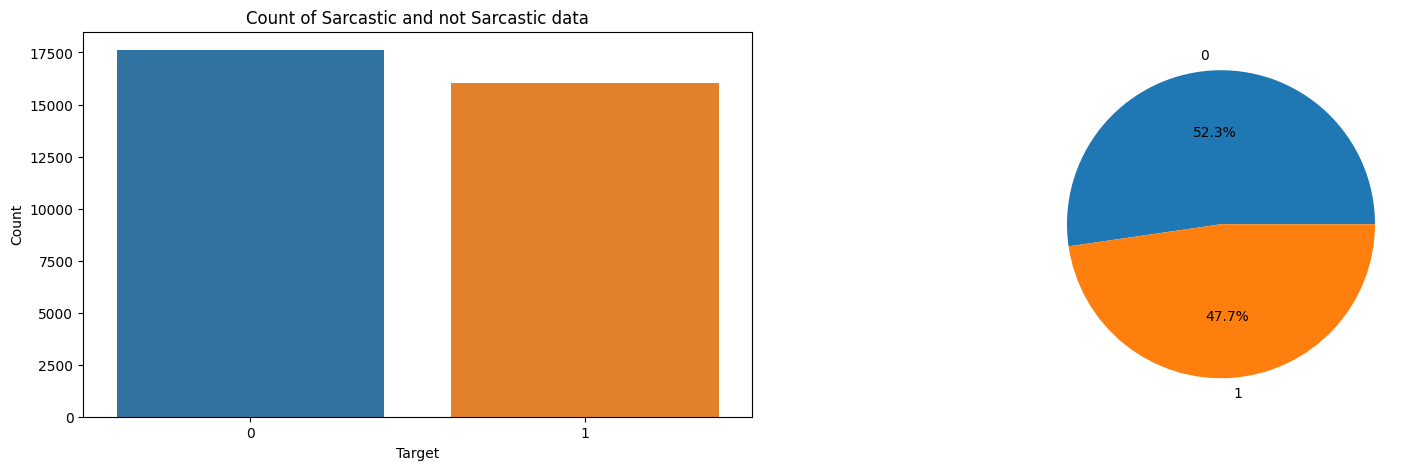

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1,2, figsize=(19, 5))
f1 = sns.countplot(y_train, ax = ax[0])
f1.set_title("Count of Fake and Real data")
f1.set_ylabel("Count")
f1.set_xlabel("Target")

f2 = plt.pie(df["class"].value_counts().values,explode=[0,0],labels=df['class'].value_counts().index, autopct='%1.1f%%')
fig.show()

In [17]:
svclf.score(xv_test,y_test)

0.9949220489977728

In [18]:
dfs=pd.read_json('../datasets/Sarcasm_Headlines_Dataset_v2.json',lines=True)
dfs.to_csv('sarcasm.csv',index=False)


In [19]:
dfs=pd.read_csv('./sarcasm.csv')
dfs=dfs[['headline','is_sarcastic']]

In [47]:
dfs.shape

(28619, 2)

In [21]:
dfs['headline']=dfs['headline'].apply(clean)

In [22]:
vectorize = TfidfVectorizer()
xs=dfs["headline"]
ys=dfs["is_sarcastic"]
Xs=vectorize.fit_transform(xs)
Xs_train,Xs_test,ys_train,ys_test=train_test_split(Xs,ys,random_state=42,test_size=0.25)

In [26]:
Xs_train

<21464x25882 sparse matrix of type '<class 'numpy.float64'>'
	with 209245 stored elements in Compressed Sparse Row format>

In [23]:
from sklearn.svm import LinearSVC
sarcsv=LinearSVC()

sarcsv.fit(Xs_train,ys_train)
def WebScrape(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html.parser') 
    listOfParas=[]
    for i in soup.find_all('p'):
        listOfParas.append(i.text.strip())
    listOfSentences=[]
    for i in listOfParas:
        for sentence in i.split('.'):
            if sentence == "":
                continue
            listOfSentences.append(sentence)
    return listOfSentences,listOfParas

c:\Users\amanb\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\amanb\AppData\Local\Temp\ipykernel_13820\627864240.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


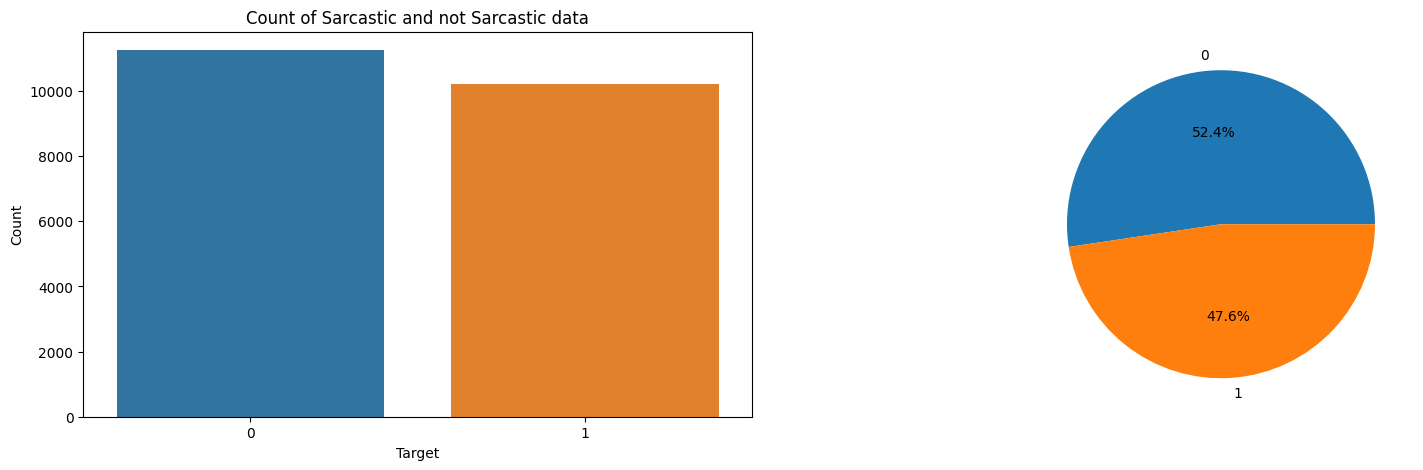

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1,2, figsize=(19, 5))
f1 = sns.countplot(ys_train, ax = ax[0])
f1.set_title("Count of Sarcastic and not Sarcastic data")
f1.set_ylabel("Count")
f1.set_xlabel("Target")

f2 = plt.pie(dfs["is_sarcastic"].value_counts().values,explode=[0,0],labels=dfs.is_sarcastic.value_counts().index, autopct='%1.1f%%')
fig.show()

In [20]:
url=str(input("Enter a news link: "))
def CalcSarcasmPercentage(los):
    los,lop=WebScrape(url)
    res=[]
    for x in los:       
        new=vectorize.transform([x]).toarray()
        ans=sarcsv.predict(new)
        res.append(ans[0])
    count=0
    for y in res:
        if y==1:
            count+=1
    percsarc=(count/len(res))*100
    return(percsarc)

def isReal(url):
    los,lop=WebScrape(url)
    testing_news = {"text":[''.join(los)]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(clean) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    print(new_xv_test)
    ans=svclf.predict(new_xv_test)
    return ans
# CalcSarcasmPercentage(url)


52.0

In [26]:

import pickle
f=open("fake.pkl","wb")
pickle.dump(svclf,f)
f.close()
g=open("sarc3.pkl","wb")
pickle.dump(sarcsv,g)
g.close()
h=open("vec.pkl","wb")
pickle.dump(vectorization,h)
h.close()
x=open("vec2.pkl","wb")
pickle.dump(vectorize,x)
x.close()
